<a href="https://colab.research.google.com/github/Mandar-Desurkar/Machine_Learning_Lab/blob/main/Q8_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


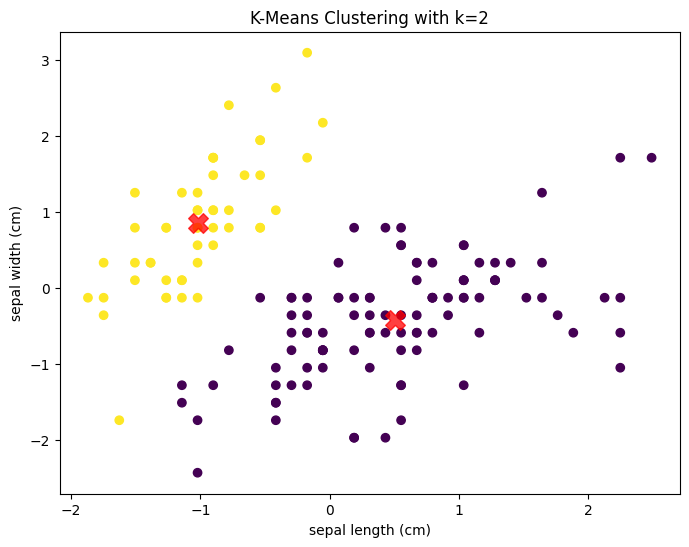

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
features = data.drop('target', axis=1)
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot clusters
def plot_clusters(scaled_features, kmeans, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'K-Means Clustering with k={k}')
    plt.show()

# K-Means with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(scaled_features)
plot_clusters(scaled_features, kmeans_2, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


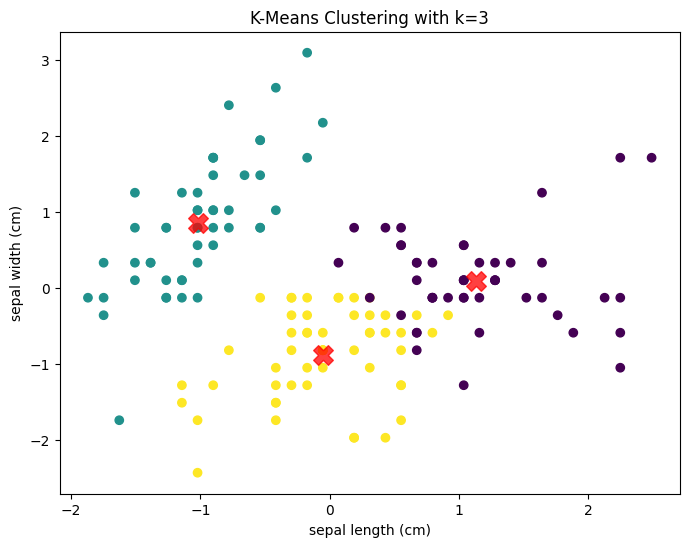

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


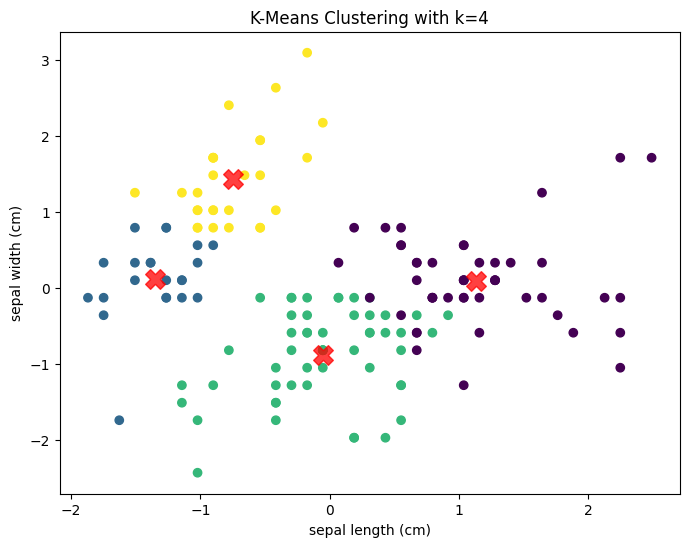

Silhouette Scores for different K values:
k=2: 0.5817500491982808
k=3: 0.45994823920518635
k=4: 0.38694104154427816


In [2]:
# K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_features)
plot_clusters(scaled_features, kmeans_3, 3)

# K-Means with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_features)
plot_clusters(scaled_features, kmeans_4, 4)
from sklearn.metrics import silhouette_score

# Compute silhouette scores
silhouette_scores = {}
silhouette_scores[2] = silhouette_score(scaled_features, kmeans_2.labels_)
silhouette_scores[3] = silhouette_score(scaled_features, kmeans_3.labels_)
silhouette_scores[4] = silhouette_score(scaled_features, kmeans_4.labels_)

print("Silhouette Scores for different K values:")
for k in silhouette_scores:
    print(f"k={k}: {silhouette_scores[k]}")
